In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

Read Csv File

In [8]:
df=pd.read_csv("tips-expt4.csv")

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Preprocessing

In [10]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Five Number Summary For Bill and Tip

In [13]:
bill = df.total_bill
print("Maximum Bill : ",np.max(bill))
print("Minimum Bill : ",np.min(bill))
print("Standard Deviation : ",np.std(bill))
print("Median : ",np.median(bill))
print("Mean : ",np.mean(bill))

Maximum Bill :  50.81
Minimum Bill :  3.07
Standard Deviation :  8.884150577771132
Median :  17.795
Mean :  19.78594262295082


In [14]:
tip = df.tip
print("Maximum Bill : ",np.max(tip))
print("Minimum Bill : ",np.min(tip))
print("Standard Deviation : ",np.std(tip))
print("Median : ",np.median(tip))
print("Mean : ",np.mean(tip))

Maximum Bill :  10.0
Minimum Bill :  1.0
Standard Deviation :  1.3807999538298954
Median :  2.9
Mean :  2.99827868852459


Exploratory Data Analysis


Male      157
Female     87
Name: sex, dtype: int64


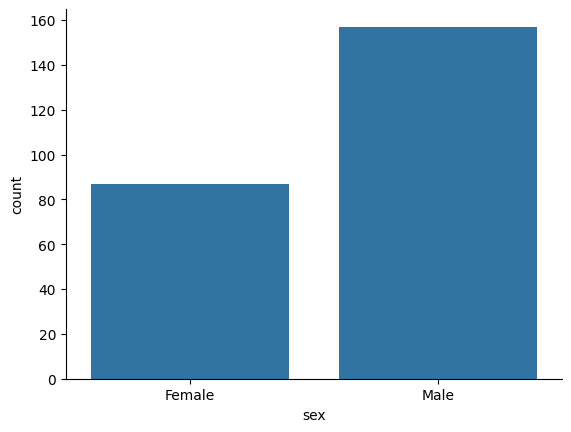

In [16]:
sns.countplot(x='sex',data=df)
sns.despine()

print(df.sex.value_counts())

<Axes: xlabel='sex', ylabel='count'>

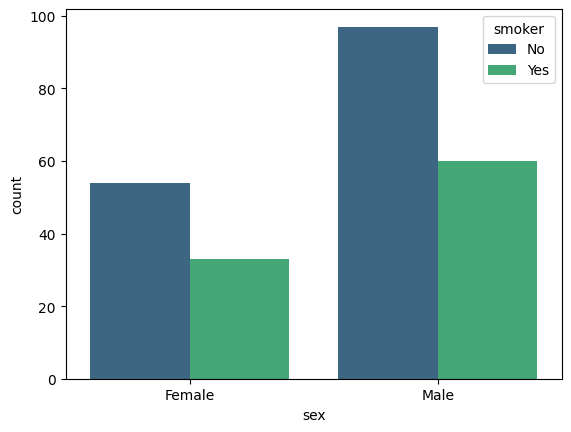

In [17]:
sns.countplot(x='sex',data=df,hue='smoker',palette='viridis')

<Axes: title={'center': 'Tips Per Day Of Week'}, xlabel='day', ylabel='count'>

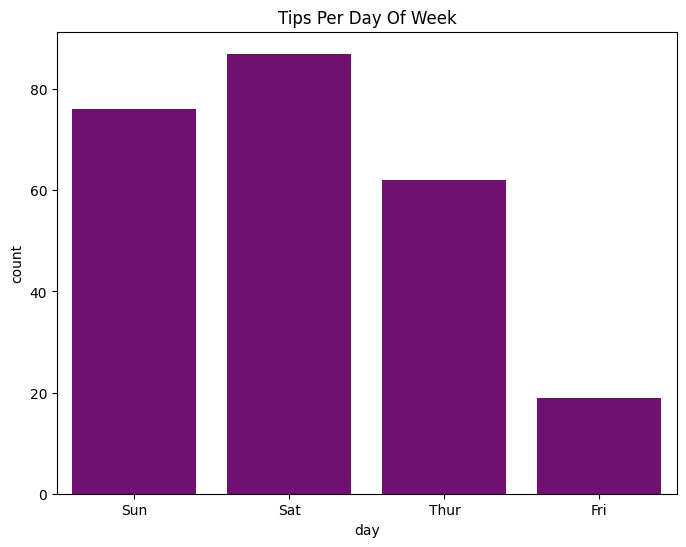

In [18]:
plt.figure(figsize=(8,6))
plt.title('Tips Per Day Of Week')
sns.countplot(x=df['day'],color='purple')

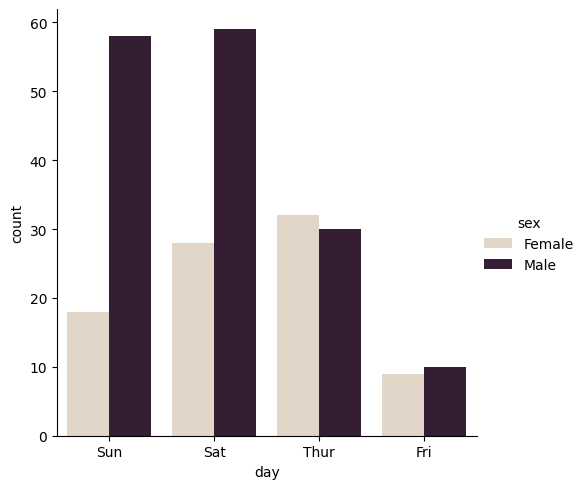

In [19]:
sns.catplot(x='day',data=df,hue='sex',palette='ch:.25',kind='count')

<ipython-input-20-3f4491b3d128>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'])


<Axes: xlabel='tip', ylabel='Density'>

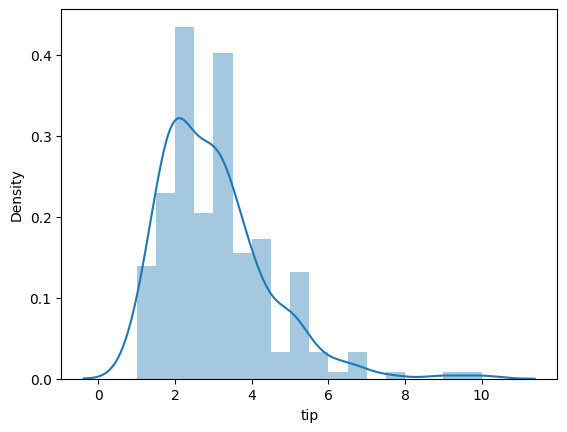

In [20]:
sns.distplot(df['tip'])

<ipython-input-21-7bcefcc626be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(df.tip,kde=False)


Text(0.5, 1.0, 'Tip Amount Histogram')

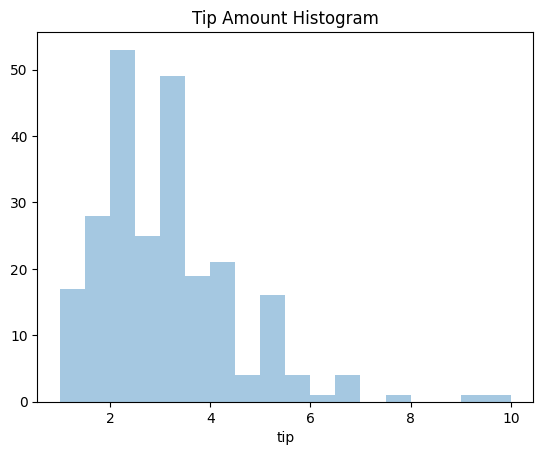

In [21]:
g=sns.distplot(df.tip,kde=False)
g.set_title('Tip Amount Histogram')

Outliers In bill column

<Axes: xlabel='total_bill'>

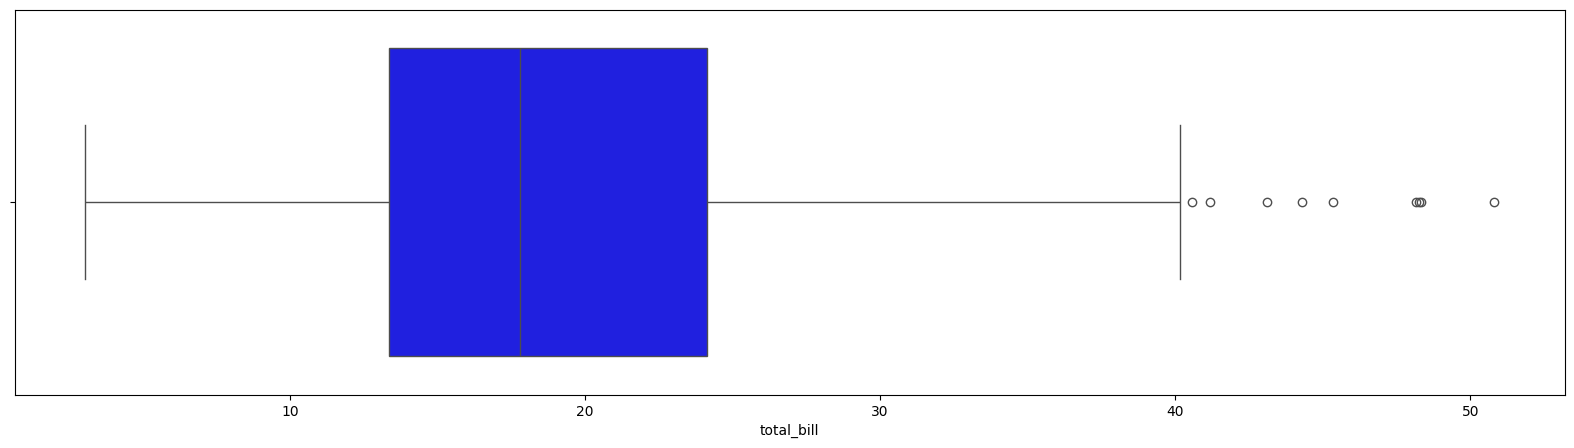

In [22]:
plt.figure(figsize=(20,5))
sns.boxplot(x=bill,color='b')

Outliers In tip column

<Axes: xlabel='tip'>

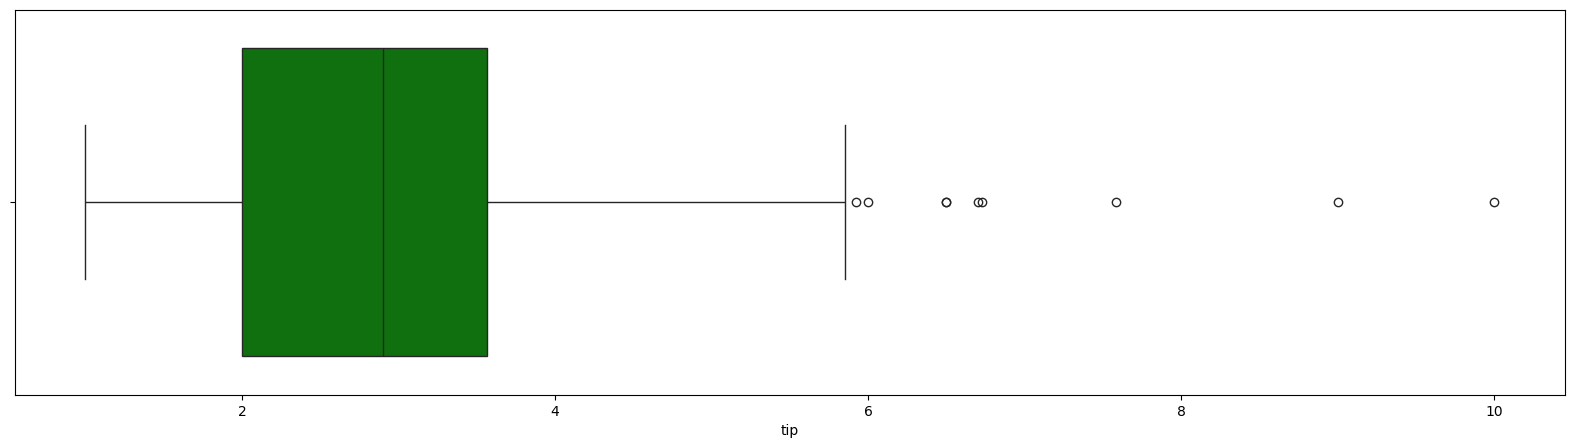

In [23]:
plt.figure(figsize=(20,5))
sns.boxplot(x=tip,color='g')

IQR Value

In [24]:
bill_tip=pd.DataFrame(df,columns=['total_bill','tips','size'])

print(bill_tip)

print("IQR For Total Bill : ",stats.iqr(bill))
print("IQR For Tip : ",stats.iqr(tip))

     total_bill  tips  size
0         16.99   NaN     2
1         10.34   NaN     3
2         21.01   NaN     3
3         23.68   NaN     2
4         24.59   NaN     4
..          ...   ...   ...
239       29.03   NaN     3
240       27.18   NaN     2
241       22.67   NaN     2
242       17.82   NaN     2
243       18.78   NaN     2

[244 rows x 3 columns]
IQR For Total Bill :  10.779999999999998
IQR For Tip :  1.5625


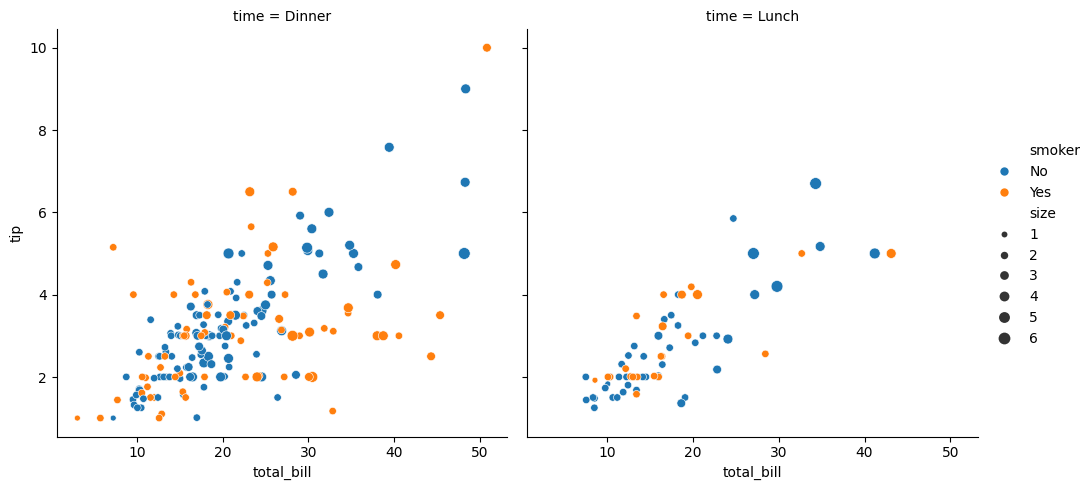

In [25]:
sns.relplot(x='total_bill',y='tip',data=df,col='time',hue='smoker',size='size')

<Axes: xlabel='total_bill', ylabel='tip'>

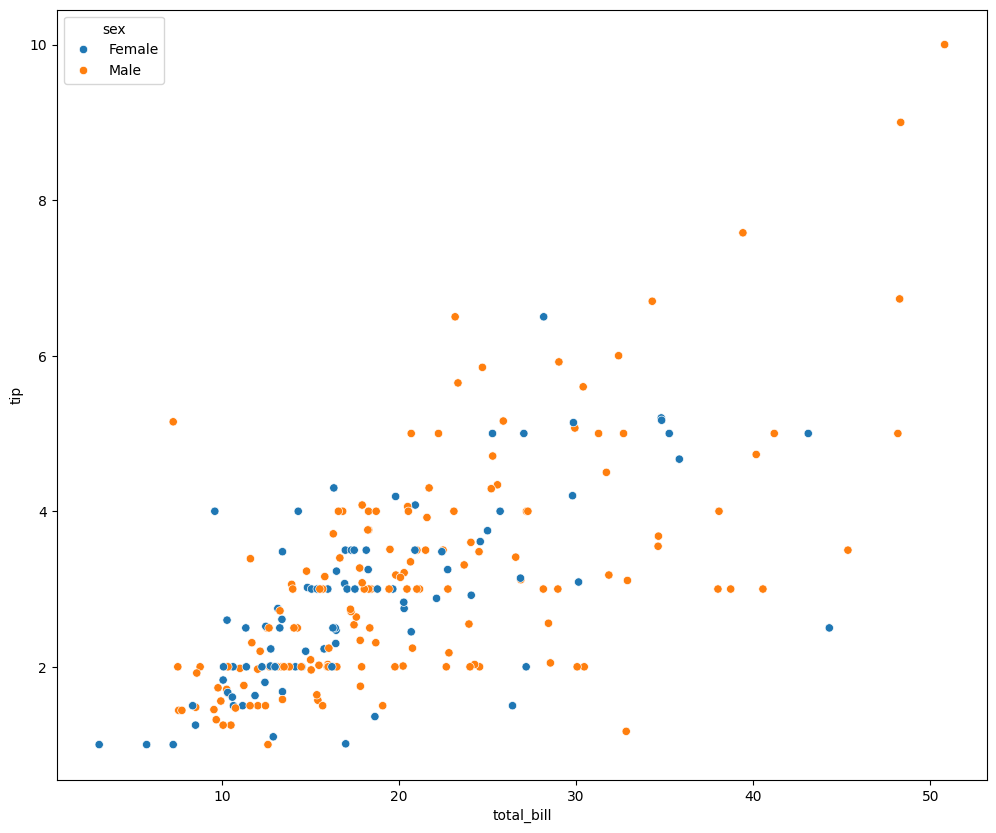

In [26]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df,x='total_bill',y="tip",hue="sex")

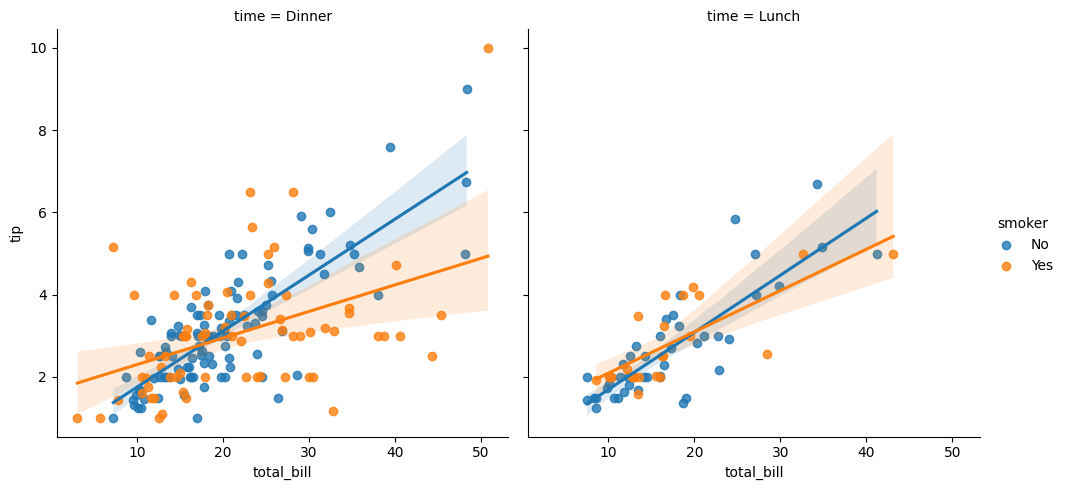

In [27]:
sns.lmplot(x='total_bill',y='tip',data=df,col='time',hue='smoker')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


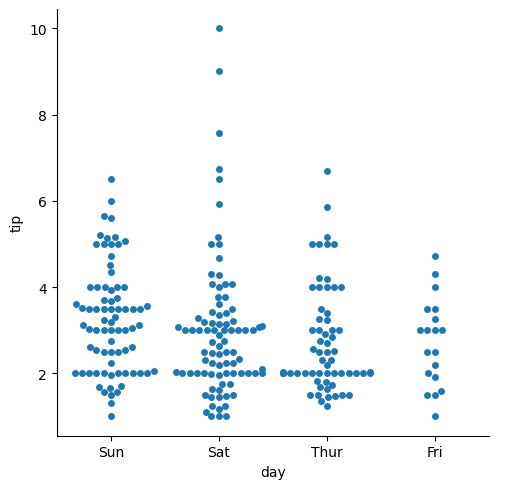

In [28]:
sns.catplot(x='day',y='tip',data=df,kind='swarm')

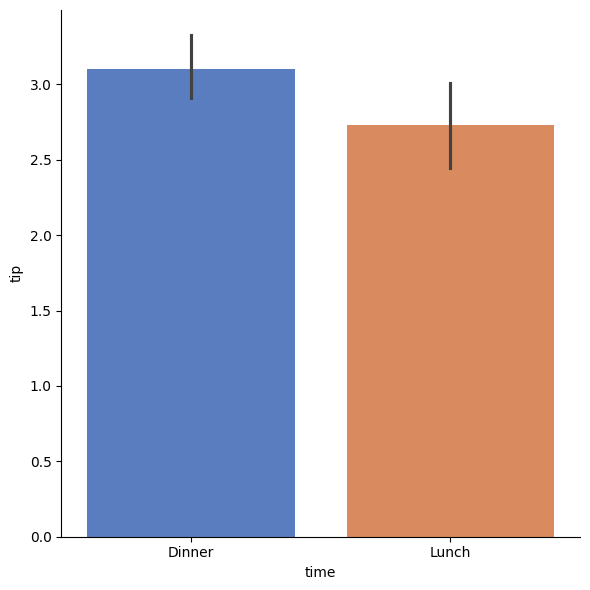

In [29]:
sns.catplot(x='time',y='tip',data=df,height=6,kind='bar',palette='muted')

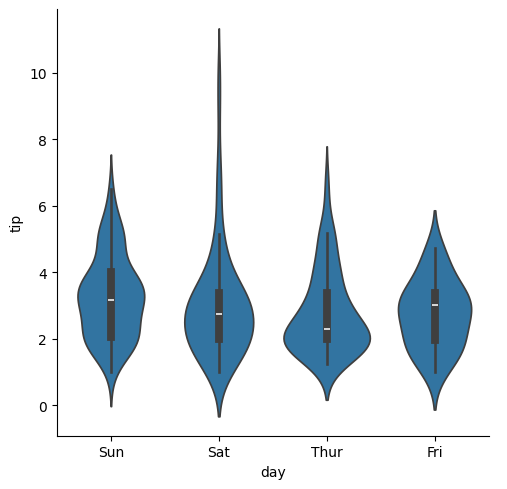

In [30]:
sns.catplot(x='day',y='tip',data=df,kind='violin')

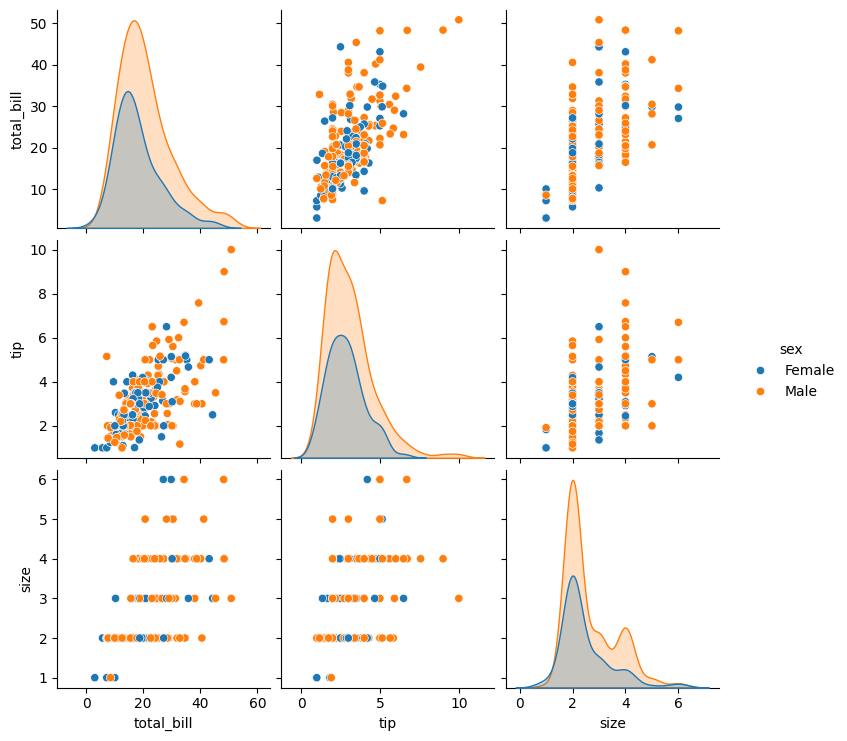

In [31]:
sns.pairplot(df,hue='sex')

Correlation Matrix

(3.5, -0.5)

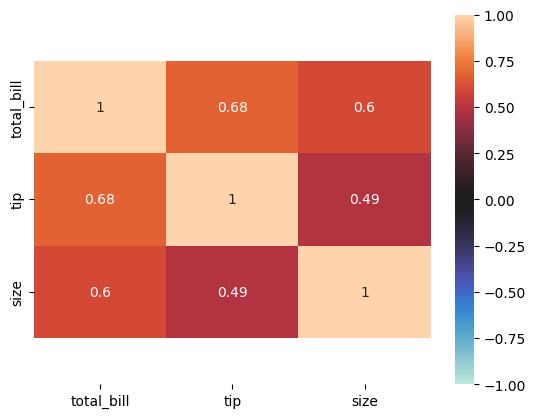

In [32]:
corr_matrix=df.corr()
ax=sns.heatmap(data=corr_matrix,annot=True,vmax=1,vmin=-1,center=0)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df['sex']=labelencoder_df.fit_transform(df['sex'])
df['smoker']=labelencoder_df.fit_transform(df['smoker'])
df['day']=labelencoder_df.fit_transform(df['day'])
df['time']=labelencoder_df.fit_transform(df['time'])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


(7.5, -0.5)

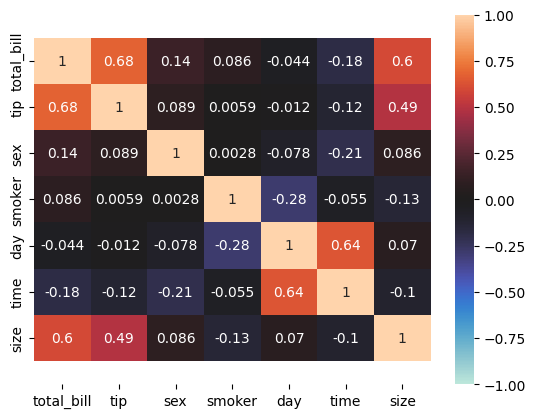

In [34]:
corr_matrix=df.corr()
ax=sns.heatmap(data=corr_matrix,annot=True,vmax=1,vmin=-1,center=0)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)